In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.datasets import fetch_openml

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# cache the downloaded dataset into 'data_home'
mnist = fetch_openml('mnist_784', version=1, cache=True)

data = mnist['data']
target = mnist['target']

In [6]:
# let us explore the shape of the inputs
print(f'the shape of the data is: {data.shape}')
print(f'the shape of the target is: {target.shape}')

the shape of the data is: (70000, 784)
the shape of the target is: (70000,)


there are 70,000 imaages, and each image has 784 features. This is because each image is 28x28 pixels, and each
feature represents 1 pixel intensity. from 0 (white) to 255 (black).

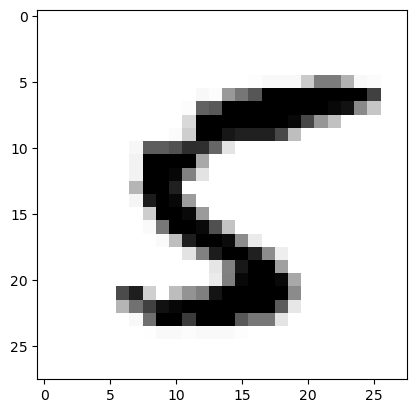

In [7]:
# Lets take a look at one digit from the datatset. 
# Grab an random instance's feature vector, reshape it to a 28X28 array, and display the same
# using matplotlib's imshow() function.
def display_image(data, random_number):
    """
    
    :param data: 
    :param idx: 
    :return: 
    """
    some_digital_image = np.array(data.iloc[random_number, :]).reshape(28, 28)
    plt.imshow(some_digital_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.show()
    
    return None

# displaying a random image
random_num = 24021
display_image(data, random_num)

In "Hands-on machine learning with scikit-learn and tensorflow" refer figure 3-1, page number 81. Create such an image for the article, showing different numbers so that readers can get the feel for the complexity of the classification task.

In [8]:
# You should always create a test set and set it aside before before inspecting the data closely.
# MNIST dataset is already split into a training set (the first 60000 images) and test set (the last 10000 images),
# see mnist['DESCR'] for more details on train, test set split.
X_train, X_test, y_train, y_test = data[:60000], data[60000:], target[:60000], target[60000:]

In [9]:
# shuffle the training data
# shuffling will guarentee that all cross-validation folds will be similar
# you don't want some of the folds to be missing some digits.
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)

TODO, write this more clearly for easy reader understading:
-------------------------------------------------------------------------------------
Now, that we have shuffled the training data, lets check if the image and its assoicated labels are inorder given that we have done shuffling seperately for X_train and y_train.

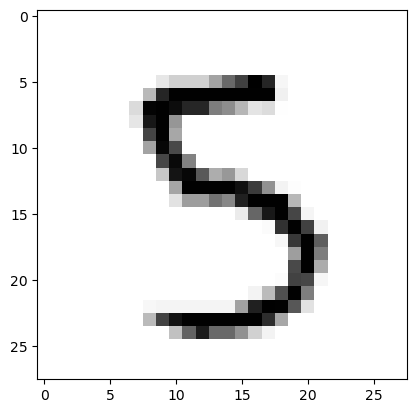

In [10]:
# just checking if the train data(X_train) and its target(y_train) is aligned after the shuffle.
random_num = 23449
some_digit = X_train.iloc[random_num, :]
display_image(X_train, random_num)

In [11]:
# training a binary classifier. Lets simplify the problem for now and only try to identify one digit.
print(y_train.head())
print(y_test.head())

y_train_5 = (y_train == '5').astype(int)
y_test_5 = (y_test == '5').astype(int)

print(y_train_5.head())
print(y_test_5.head())

0    7
1    3
2    8
3    9
4    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64
60000    0
60001    0
60002    0
60003    0
60004    0
Name: class, dtype: int64


In [12]:
# TODO write it better
# Now, all instance which had label as 5 has turned into 1, and the rest 0
sum(y_train_5 == 1)
sum(y_test_5 == 1)

5421

892

In [13]:
from sklearn.linear_model import SGDClassifier

# initiate and train sgd classifier.
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
y_pred = sgd_clf.predict(np.expand_dims(some_digit, axis=0))
y_pred.shape

(1,)

In [15]:
y_hat_5 = sgd_clf.predict(X_test)
y_hat_5.shape

(10000,)

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
confusion_matrix(y_test_5, y_hat_5)
precision_score(y_test_5, y_hat_5)
recall_score(y_test_5, y_hat_5)
accuracy_score(y_test_5, y_hat_5)
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([[8920,  188],
       [ 137,  755]])

0.8006362672322376

0.8464125560538116

0.9675

array([0.9681 , 0.95655, 0.95515])

In [17]:
sgd_clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.70971875e-02, -2.29145931e-01,
        -2.11937344e-01, -5.97771995e-01, -3.77683215e-01,
        -1.38574417e-01, -7.61706436e-01, -1.52522430e+00,
        -7.94312181e-01, -2.43275088e+00, -2.00072475e+00,
        -4.35648984e-01, -1.24988690e-01,  0.00000000e+0

In [18]:
sgd_clf.intercept_

array([95.61738])

In [19]:
sgd_clf.n_iter_
sgd_clf.loss_function_
sgd_clf.classes_
sgd_clf.t_

184

array([0, 1])

11040001.0

In [20]:
sgd_clf.n_features_in_
sgd_clf.feature_names_in_

784

array(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12',
       'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18',
       'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24',
       'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30',
       'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36',
       'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42',
       'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48',
       'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54',
       'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60',
       'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66',
       'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72',
       'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78',
       'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83'

In [21]:
# to identify evaluation parameters better,
# lets implement cross-validation.

# stratifiedKFold is to keep representative ratio of each class in the train and test sets
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

# TODO check whether both the shuffle here and shuffle already done over the top is required.
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for _idx, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train_5)):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index, :]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train.iloc[test_index, :]
    y_test_folds = y_train_5[test_index]
    
    _ = clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    print(f'fold {_idx} precision is {precision_score(y_test_folds, y_pred)}')
    print(f'fold {_idx} recall is {recall_score(y_test_folds, y_pred)}')

fold 0 precision is 0.9290322580645162
fold 0 recall is 0.6375207526286663
fold 1 precision is 0.7581441263573544
fold 1 recall is 0.8500276701715551
fold 2 precision is 0.9355742296918768
fold 2 recall is 0.5545102379634754


# might be required for the article

for _idx, (train_idx, test_idx) in enumerate(skfolds.split(X_train, y_train_5)):
    y_train_folds = y_train_5[train_idx]
    y_test_folds = y_train_5[test_idx]  
    
    print(f'Fold: {_idx}')
    print('train data')
    print(y_train_folds.value_counts(normalize=True).reset_index())
    print('test data')
    print(y_test_folds.value_counts(normalize=True).reset_index())

In [22]:
# building a dumb classifier
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=int)

In [23]:
not5_clf = Never5Classifier()
cross_val_score(not5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.909  , 0.90745, 0.9125 ])

In [24]:
# cross_val_predict.
# this is similar to cross_val_score, but instead of returning the evaluation scores,
# cross_val_predict returns the prediction made on each test fold.

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

array([[53124,  1455],
       [  949,  4472]])

0.7881565033486078

In [26]:
y_scores = sgd_clf.decision_function(np.expand_dims(some_digit, axis=0))
print(y_scores)

[1529.51751892]


In [27]:
# how to decide which threshold to use:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
print(y_scores.shape)

(60000,)


In [28]:
# precision recall curve function.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('threshold')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid()
    plt.show()

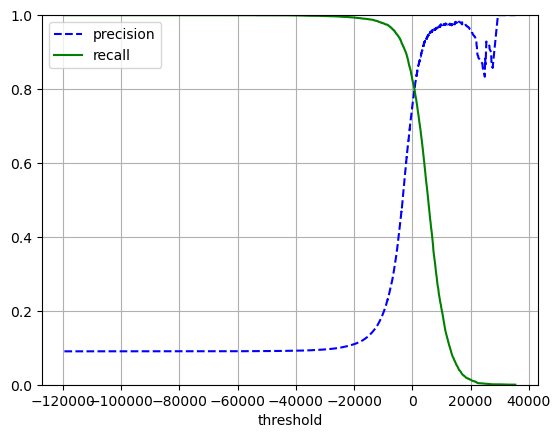

In [30]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

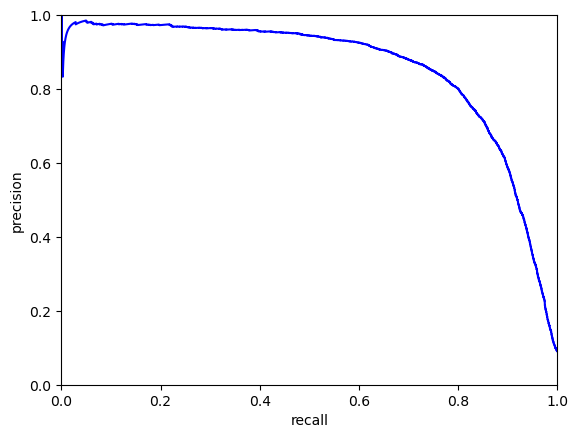

In [31]:
def plot_precision_recall_curve(precision, recall):
    plt.plot(recall, precision, 'b-')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show
    
plot_precision_recall_curve(precisions, recalls)

In [32]:
# The ROC curve (the receiver operating characteristic curve).
# ROC is only used in the case of binary classifiers.
# this is similar to precision vs recall curve, only that it is plotted between true positive rate(recall) 
# and false positive rate.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0,1], 'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

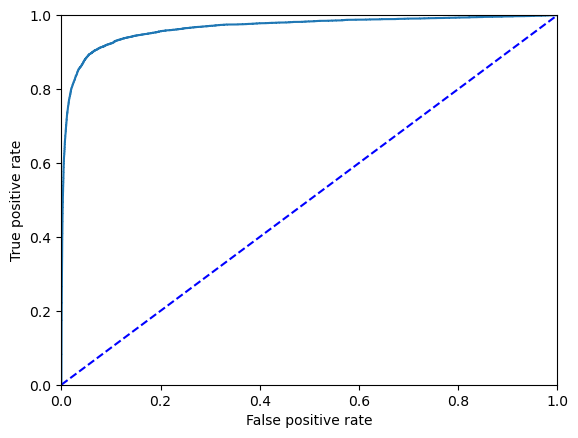

In [34]:
plot_roc_curve(fpr, tpr)

In [35]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9660259463088996


In [36]:
# Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method='predict_proba')

In [37]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_probas_forest[:, 1])

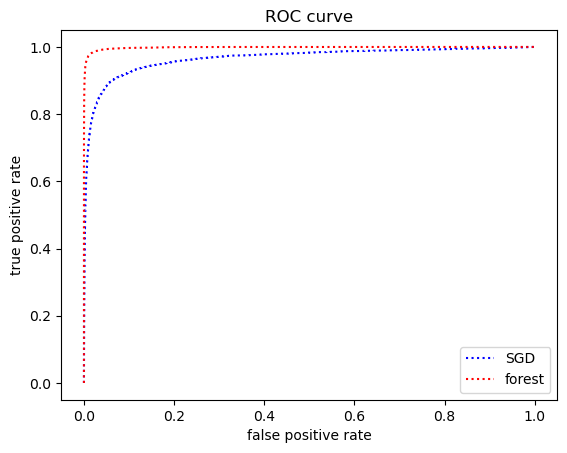

In [38]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, 'r:', label='forest')
plt.legend()
_ = plt.title('ROC curve')
_ = plt.xlabel('false positive rate')
_ = plt.ylabel('true positive rate')
plt.show()

In [39]:
forest_clf = forest_clf.fit(X_train, y_train_5)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(f'the accuracy is: {accuracy_score(y_train_5, y_train_pred_forest)}')
print(f'the precision is: {precision_score(y_train_5, y_train_pred_forest)}')
print(f'the recall is: {recall_score(y_train_5, y_train_pred_forest)}')
print(f'the F1 score is: {f1_score(y_train_5, y_train_pred_forest)}')

the accuracy is: 0.98735
the precision is: 0.9890893831305078
the recall is: 0.8695812580704667
the F1 score is: 0.9254932757435947


In [40]:
# Multi-class classification using stochastic gradient descent.
sgd_clf.fit(X_train, y_train) # one vs all would be used here.
print(sgd_clf.predict([some_digit]))

SGDClassifier(random_state=42)

['5']


In [41]:
some_digit_decision_score = sgd_clf.decision_function([some_digit])
print(some_digit_decision_score)

[[-32063.00220129 -31446.70968205  -7743.23034774  -1353.84233686
   -9410.1851373    1773.36364828 -13869.46831137 -17537.09213012
    -509.22651532  -6793.08602264]]


In [42]:
np.argmax(some_digit_decision_score)
sgd_clf.classes_

5

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [43]:
# forcing one-versus-one or one-versus-all.
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

array(['3'], dtype=object)

In [44]:
ovo_clf.n_classes_

10

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

RandomForestClassifier(random_state=42)

array(['5'], dtype=object)

In [46]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  ]])

In [47]:
# Evaluate the classifiers.
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8678 , 0.88195, 0.86965])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# Evaluate the classifiers after scaling the input.
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90425, 0.9031 , 0.8903 ])

In [49]:
# Error Analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   19,    5,   10,   39,   33,    5,  234,    1],
       [   1, 6413,   44,   17,    4,   45,    4,    8,  198,    8],
       [  23,   32, 5249,   88,   71,   20,   62,   39,  366,    8],
       [  27,   20,  115, 5216,    0,  197,   24,   44,  425,   63],
       [   7,   14,   46,   11, 5216,    8,   35,   20,  331,  154],
       [  28,   19,   31,  141,   52, 4466,   78,   18,  523,   65],
       [  27,   16,   50,    2,   39,   87, 5564,    7,  126,    0],
       [  20,   11,   52,   23,   50,   10,    4, 5702,  190,  203],
       [  18,   60,   42,  101,    2,  120,   32,   12, 5425,   39],
       [  22,   21,   29,   62,  123,   35,    1,  170,  361, 5125]])

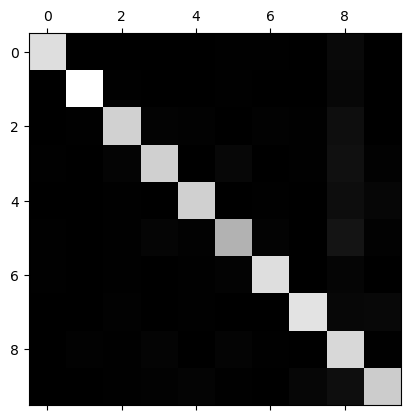

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [51]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.20783387e-03, 8.44166807e-04,
        1.68833361e-03, 6.58450110e-03, 5.57150093e-03, 8.44166807e-04,
        3.95070066e-02, 1.68833361e-04],
       [1.48323939e-04, 9.51201424e-01, 6.52625334e-03, 2.52150697e-03,
        5.93295758e-04, 6.67457728e-03, 5.93295758e-04, 1.18659152e-03,
        2.93681400e-02, 1.18659152e-03],
       [3.86035582e-03, 5.37092984e-03, 8.81000336e-01, 1.47700571e-02,
        1.19167506e-02, 3.35683115e-03, 1.04061766e-02, 6.54582075e-03,
        6.14300101e-02, 1.34273246e-03],
       [4.40384929e-03, 3.26211059e-03, 1.87571359e-02, 8.50758441e-01,
        0.00000000e+00, 3.21317893e-02, 3.91453270e-03, 7.17664329e-03,
        6.93198499e-02, 1.02756483e-02],
       [1.19821979e-03, 2.39643958e-03, 7.87401575e-03, 1.88291681e-03,
        8.92844916e-01, 1.36939404e-03, 5.99109894e-03, 3.42348511e-03,
        5.66586785e-02, 2.63608353e-02],
       [5.16509869e-03, 3.50488840e-03, 5.71850212e-03, 2.60099613e-02,
   

In [52]:
np.fill_diagonal(norm_conf_mx, val=0)

In [53]:
norm_conf_mx

array([[0.        , 0.        , 0.00320783, 0.00084417, 0.00168833,
        0.0065845 , 0.0055715 , 0.00084417, 0.03950701, 0.00016883],
       [0.00014832, 0.        , 0.00652625, 0.00252151, 0.0005933 ,
        0.00667458, 0.0005933 , 0.00118659, 0.02936814, 0.00118659],
       [0.00386036, 0.00537093, 0.        , 0.01477006, 0.01191675,
        0.00335683, 0.01040618, 0.00654582, 0.06143001, 0.00134273],
       [0.00440385, 0.00326211, 0.01875714, 0.        , 0.        ,
        0.03213179, 0.00391453, 0.00717664, 0.06931985, 0.01027565],
       [0.00119822, 0.00239644, 0.00787402, 0.00188292, 0.        ,
        0.00136939, 0.0059911 , 0.00342349, 0.05665868, 0.02636084],
       [0.0051651 , 0.00350489, 0.0057185 , 0.02600996, 0.00959233,
        0.        , 0.01438849, 0.00332042, 0.09647666, 0.01199041],
       [0.00456235, 0.00270362, 0.0084488 , 0.00033795, 0.00659006,
        0.01470091, 0.        , 0.00118283, 0.02129098, 0.        ],
       [0.00319234, 0.00175579, 0.0083000

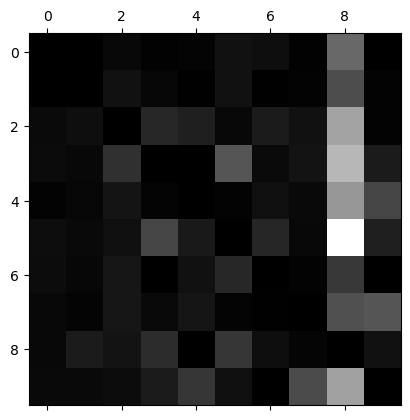

In [54]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [65]:
def plot_digits(instances, images_per_row=10, **options):
    
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [60]:
cl_a, cl_b = '3', '5'
X_aa = X_train.loc[(y_train == cl_a) & (y_train_pred == cl_a), :]
X_bb = X_train.loc[(y_train == cl_b) & (y_train_pred == cl_b), :]
X_ab = X_train.loc[(y_train == cl_a) & (y_train_pred == cl_b), :]
X_ba = X_train.loc[(y_train == cl_b) & (y_train_pred == cl_a), :]

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa.iloc[:25, :], images_per_rows=5)
plt.subplot(222); plot_digits(X_ad.iloc[:25, :], images_per_rows=5)
plt.subplot(223); plot_digits(X_aa.iloc[:25, :], images_per_rows=5)
plt.subplot(224); plot_digits(X_aa.iloc[:25, :], images_per_rows=5)

In [55]:
y_train

0        7
1        3
2        8
3        9
4        3
        ..
59995    3
59996    8
59997    0
59998    0
59999    4
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [56]:
y_train_pred

array(['7', '3', '8', ..., '0', '0', '4'], dtype='<U1')

In [ ]:
# mnist data using densely connected neural networks.

In [ ]:
# mnist data using convolutional neural networks.